In [1]:
# Importing proper Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Viewing Data
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# Viewing Dataset Structure
print(df.head())
print(df.info())
print(df['Education'].value_counts())

   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [4]:
# Map education codes to labels (based on the IBM HR Data Book)
education_map = {
    1: "Below College",
    2: "College",
    3: "Bachelor",
    4: "Master",
    5: "Doctor"
}
df['EducationLevel'] = df['Education'].map(education_map)

# Group by Education and Attrition to compute average income
income_summary = df.groupby(['EducationLevel', 'Attrition'])['MonthlyIncome'].mean().reset_index()
print(income_summary)

  EducationLevel Attrition  MonthlyIncome
0       Bachelor        No    6882.919662
1       Bachelor       Yes    4770.242424
2  Below College        No    5926.129496
3  Below College       Yes    4360.161290
4        College        No    6586.058824
5        College       Yes    4282.545455
6         Doctor        No    8559.906977
7         Doctor       Yes    5850.200000
8         Master        No    7087.814706
9         Master       Yes    5335.155172


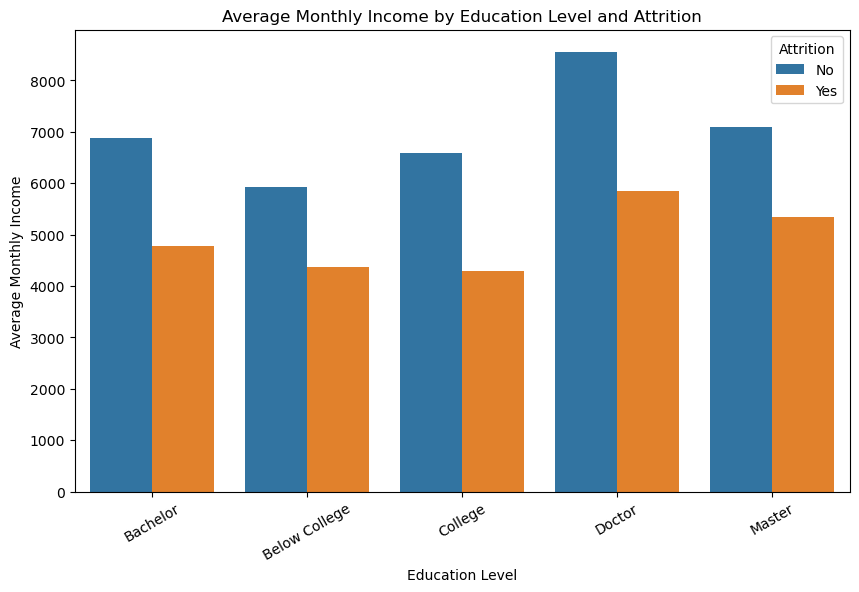

In [5]:
# Visualization: Barplot of Average Monthly Income by Education & Attrition
plt.figure(figsize=(10,6))
sns.barplot(data=income_summary, x='EducationLevel', y='MonthlyIncome', hue='Attrition')
plt.title("Average Monthly Income by Education Level and Attrition")
plt.xlabel("Education Level")
plt.ylabel("Average Monthly Income")
plt.xticks(rotation=30)
plt.legend(title="Attrition")
plt.show()

C:\Users\bjone\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


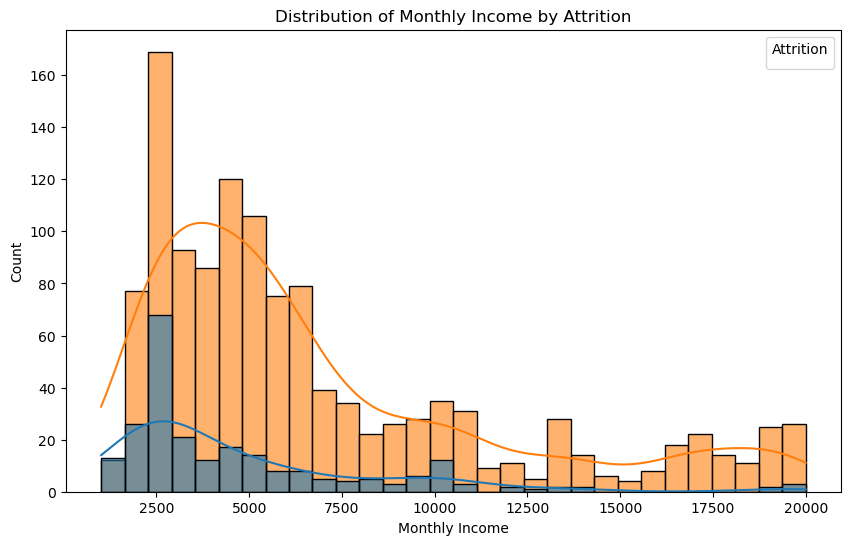

In [6]:
# Histogram Plot: Monthly Income by Attrition
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="MonthlyIncome", hue="Attrition", kde=True, bins=30, alpha=0.6)
plt.title("Distribution of Monthly Income by Attrition")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.legend(title="Attrition")
plt.show()

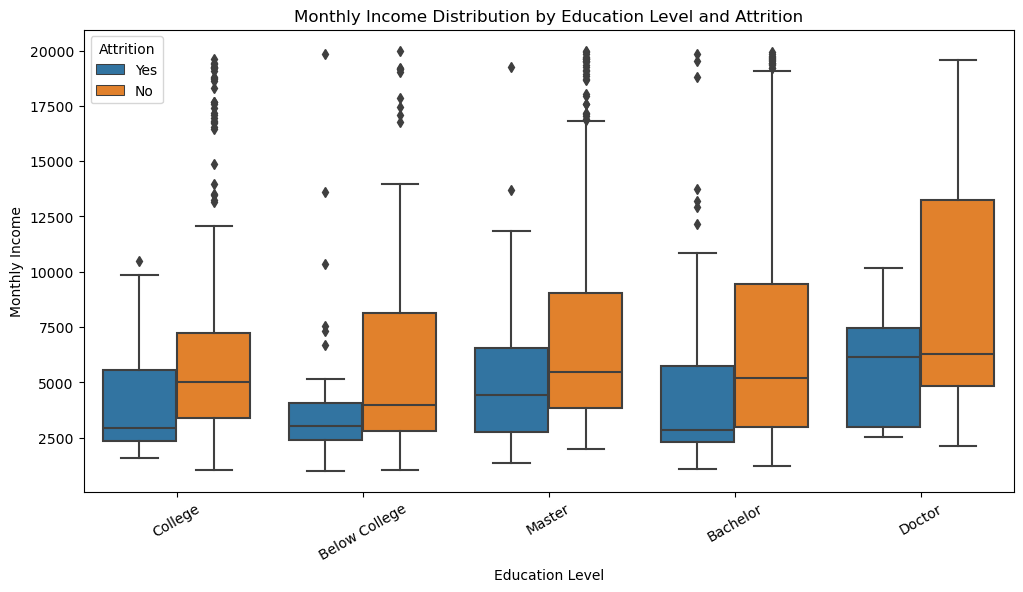

In [7]:
# Boxplot: Monthly Income by Education and Attrition
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="EducationLevel", y="MonthlyIncome", hue="Attrition")
plt.title("Monthly Income Distribution by Education Level and Attrition")
plt.xlabel("Education Level")
plt.ylabel("Monthly Income")
plt.xticks(rotation=30)
plt.show()

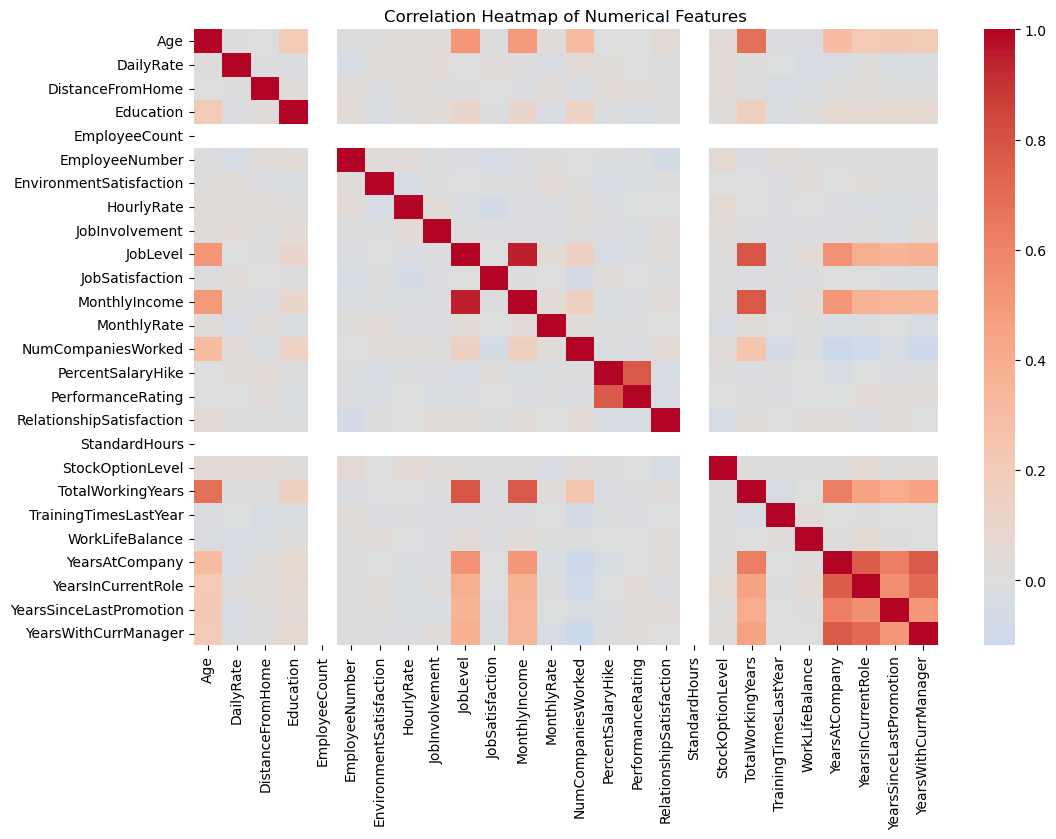

In [8]:
# Correlation Heatmap: Numerical Features
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include=['int64', 'float64'])  # only numeric variables
corr = numeric_df.corr()

sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


In [9]:
# If you want to zoom in on just Attrition correlations:
# Convert Attrition to numeric for correlation
# Convert Attrition to numeric for correlation
df['Attrition_Flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlations
corr_target = numeric_df.corr()['Attrition_Flag'].sort_values(ascending=False)



plt.figure(figsize=(8,6))
print("Correlation of features with Attrition:\n", corr_target)

Correlation of features with Attrition:
 Attrition_Flag              1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    N

<Figure size 800x600 with 0 Axes>